In [ ]:
!pip install -q rpy2

In [ ]:
%load_ext rpy2.ipython

# Step 1: Setup (Run in Python Cell)

In [ ]:
# Install required system packages and R libraries
!apt-get install -y libxml2-dev
!R -e "install.packages(c('rvest', 'tm', 'wordcloud', 'SnowballC', 'xml2'), repos='http://cran.us.r-project.org')"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libxml2-dev is already the newest version (2.9.13+dfsg-1ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

R version 4.5.0 (2025-04-11) -- "How About a Twenty-Six"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages(c('rvest', 'tm', 'wordcloud', 'SnowballC', 'xml2'), repos='http

# Step 2: Full R Script (Run in R Cell)

In [ ]:
%%R
# Load libraries
library(rvest)
library(tm)
library(SnowballC)
library(wordcloud)
library(xml2)

In [ ]:
%%R

# Step 1: Scrape Wikipedia page
url <- "https://en.wikipedia.org/wiki/Global_warming"
page <- read_html(url)
paragraphs <- page %>%
  html_elements("p") %>%
  html_text()
text <- paste(paragraphs, collapse = " ")

In [ ]:
%%R

# Step 2: Preprocess text
corpus <- VCorpus(VectorSource(text))

In [ ]:
%%R

# Convert to lower case, remove numbers, punctuation, stopwords, etc.
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeWords, stopwords("english"))
corpus <- tm_map(corpus, stripWhitespace)
corpus <- tm_map(corpus, stemDocument)


In [ ]:
%%R

# Step 3: Create Document-Term Matrix (DTM)
dtm <- DocumentTermMatrix(corpus)

In [ ]:
%%R

# Step 4: Inspect DTM
# dtm: A matrix of term frequencies
inspect(dtm)


<<DocumentTermMatrix (documents: 1, terms: 1487)>>
Non-/sparse entries: 1487/0
Sparsity           : 0%
Maximal term length: 18
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs  °c can carbon chang climat emiss energi global increas warm
   1  42  50     42   116    154    65     45     75      74   97


# Step 3: Create Word Cloud

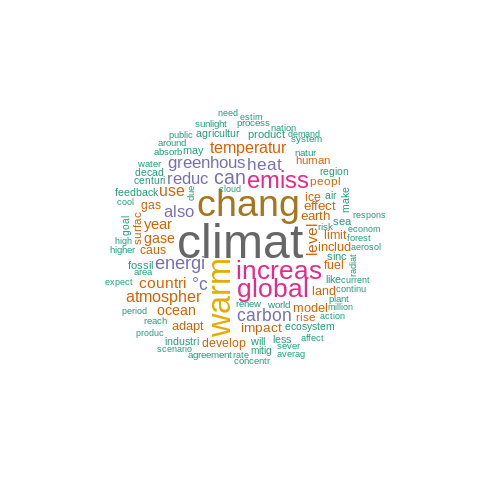

In [ ]:
%%R

# Step 5: Create Word Cloud
wordcloud(corpus, max.words = 100, random.order = FALSE, colors = brewer.pal(8, "Dark2"))


In [ ]:
%%R
